# Predicting Employee Productivity Using Decision Tree and Random Forest

## Table of Contents

- [1. Introduction](#1.-Introduction)
- [2. Exploring the Dataset](#2.-Exploring-the-Dataset)
    - [2.1. Displaying Dataset Information and Summary Statistics](#2.1.-Displaying-Dataset-Information-and-Summary-Statistics)
    - [2.2. Verifying Data Consistency in Individual Columns](#2.2.-Verifying-Data-Consistency-in-Individual-Columns)
- [3. Cleaning the Dataset (I)](#3.-Cleaning-the-Dataset-(I))
- [4. Cleaning the Dataset (II)](#4.-Cleaning-the-Dataset-(II))
- [5. Building the Decision Tree](#5.-Building-the-Decision-Tree)
- [6. Visualizing and Evaluating the Tree](#6.-Visualizing-and-Evaluating-the-Tree)
- [7. Explaining the Decision Tree](#7.-Explaining-the-Decision-Tree)
- [8. Building the Random Forest](#8.-Building-the-Random-Forest)
- [9. Conclusion](#9.-Conclusion)

## 1. Introduction

In this project, we'll introduce the [Productivity Prediction of Garment Employees](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees) dataset, which originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/). The garment industry is one of the key examples of industrial globalization in the modern era.

This industry is highly labor-intensive, involving numerous manual processes. Meeting the enormous global demand for garment products largely depends on the production and delivery performance of employees in garment manufacturing companies. Consequently, it is highly desirable for decision-makers in the garment industry to track, analyze, and predict the productivity of working teams in their factories.

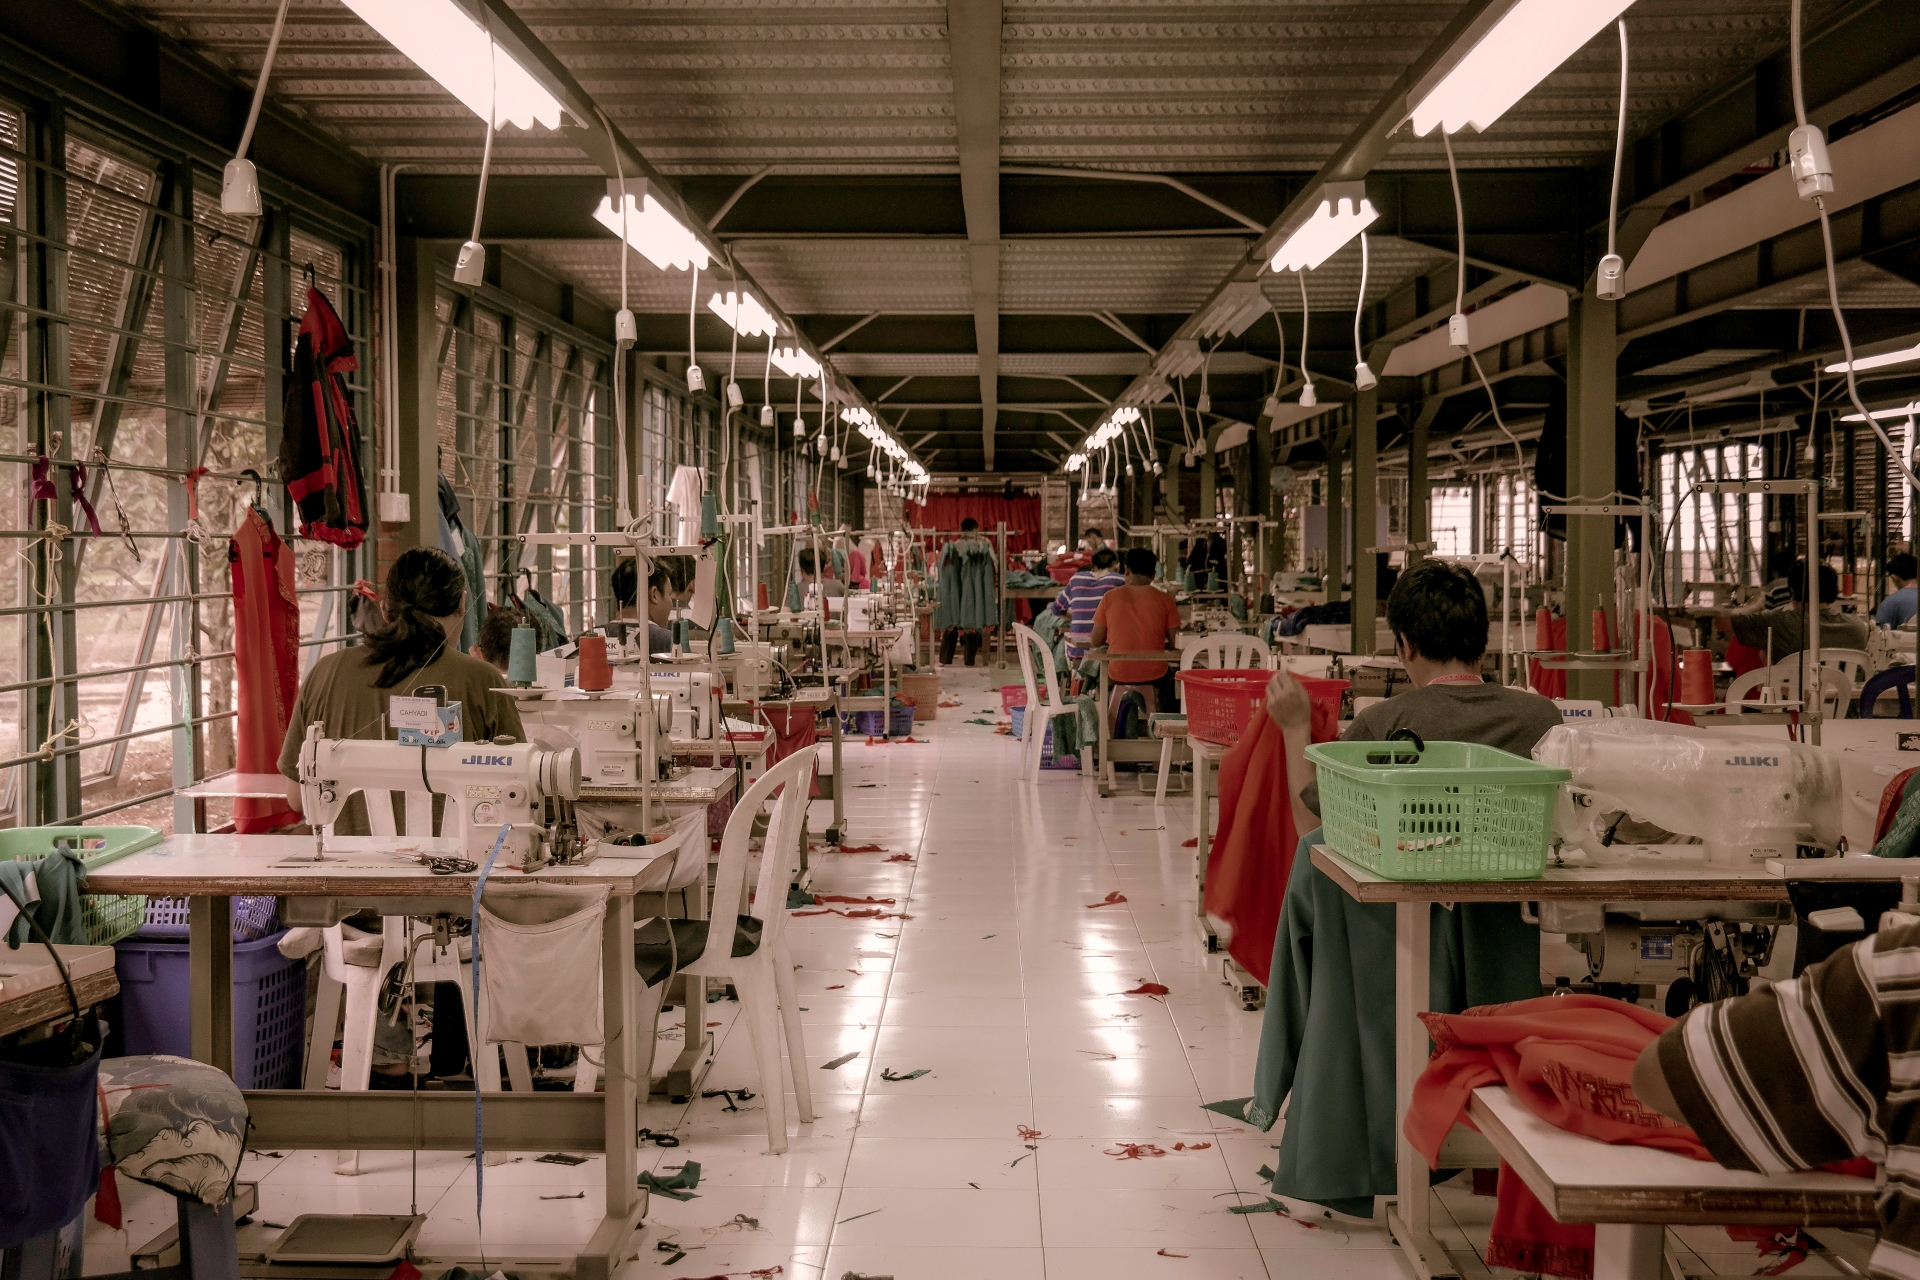

Interestingly, we can use the dataset for regression by predicting the productivity range, or for classification by transforming the range into different classes. However, we'll focus solely on classification. Here's what each column represents:

- `date` – Date in `MM-DD-YYYY`.
- `quarter` – Portion of the month, with the month divided into five quarters.
- `department` – Department associated with the instance.
- `day` – Day of the week.
- `team` – Team number associated with the instance.
- `targeted_productivity` – Targeted productivity set by the authority for each team per day.
- `smv` – Standard minute value; the allocated time for a task.
- `wip` – Work in progress; the number of unfinished items.
- `over_time` – Overtime by each team in minutes.
- `incentive` – Financial incentive (in `BDT`) that motivates a particular action.
- `idle_time` – Time when production was interrupted in minutes.
- `idle_men` – Number of workers idle due to production interruption.
- `no_of_style_change` – Number of changes in product style.
- `no_of_workers` – Number of workers on each team.
- `actual_productivity` – Actual productivity delivered by the workers.

First, let's import the required libraries and load the dataset into a DataFrame.

In [1]:
# Import the relevant libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import pandas as pd

# Set the display option to avoid truncating columns
pd.set_option('display.max_columns', None)

# Load the dataset and display the first few rows
df = pd.read_csv("Datasets/garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


The first few rows show data recorded on `January 1, 2015`, during the first quarter of the month. The `sewing` and `finishing` departments are represented, with teams assigned specific productivity targets. There are different values for Standard Minute Value (`SMV`), work in progress (`WIP`), overtime, incentive, and the number of workers. Moreover, the `actual_productivity` column reflects the percentage of productivity achieved, with values close to or above the targeted productivity.

## 2. Exploring the Dataset

### 2.1. Displaying Dataset Information and Summary Statistics

Next, we'll perform exploratory data analysis to understand the dataset's structure, characteristics, and the insights it offers.

In [2]:
# Display dataset information and summary of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

The dataset contains `1,197` entries and `15` columns, and features both numerical and categorical data, with column types including objects, integers, and floats. All columns have complete data, except for `wip`, which has missing values.

The name of the `quarter` column is somewhat misleading, as `quarter` typically refers to a part of a year, but in this case, it refers to a part of a month. This illustrates why it's important not to make assumptions about the data based solely on a column's name.

In [3]:
# Generate summary statistics for numerical columns
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


From the table above, here are some insights:

- The average targeted productivity is `0.73`, while the actual productivity has a mean of `0.74`, indicating generally high productivity.
- The standard minute value averages around `15.06`, while work in progress varies widely, with a mean of `1,190.47` minutes and a high standard deviation. Overtime averages about `4,567` minutes, and incentives average `38.21 BDT`.
- Idle time is extremely low, with a mean of `0.73` minutes, and idle men average `0.37`, suggesting highly efficient time management in the factory.
- The number of style changes is minimal, with a mean of `0.15`, and the average number of workers per team is `34.61`.

### 2.2. Verifying Data Consistency in Individual Columns

Now, we will examine a few columns to check if our data is consistent.

In [4]:
# Count the occurrences of each department and display unique department names
display(df["department"].value_counts())
display(df["department"].unique())

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In the `department` column, there are two distinct `finishing` values due to one instance having an extra trailing space. We also notice that `sewing` is misspelled as `sweing`.

In [5]:
# Display the count of entries for each quarter
display(df["quarter"].value_counts())

# Print the minimum and maximum dates for entries in Quarter 5
print(f'Minimum date in Quarter 5: {df.loc[df["quarter"] == "Quarter5", "date"].min()}')
print(f'Maximum date in Quarter 5: {df.loc[df["quarter"] == "Quarter5", "date"].max()}')

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

Minimum date in Quarter 5: 1/29/2015
Maximum date in Quarter 5: 1/31/2015


In the dataset, `Quarter5` has the fewest entries, with only `44` observations. The dates for `Quarter5` range from `January 29, 2015` to `January 31, 2015`, indicating that it covers a very short time period.

In [6]:
# Count occurrences of each day of the week
df["day"].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

Interestingly, there are no observations for Fridays. This doesn’t necessarily indicate missing information; it could simply mean that the factory is closed on Fridays.

In [7]:
# Calculate the percentage of observations where actual productivity is above the target
print(f'The percentage of observations where actual productivity was above the target is: \
{round((df[df["actual_productivity"] > df["targeted_productivity"]].shape[0] * 100 / df.shape[0]), 2)}%')

# Calculate the percentage of observations where actual productivity is below the target
print(f'The percentage of observations where actual productivity was below the target is: \
{round((df[df["actual_productivity"] < df["targeted_productivity"]].shape[0] * 100 / df.shape[0]), 2)}%')

The percentage of observations where actual productivity was above the target is: 72.6%
The percentage of observations where actual productivity was below the target is: 26.9%


Overall, the data shows that the factory generally performs well above the set productivity targets but occasionally falls short.

In [8]:
# Count instances where idle time exists without idle workers, and vice versa
print(df[(df["idle_time"] > 0) & (df["idle_men"] == 0)].shape[0],
      df[(df["idle_time"] == 0) & (df["idle_men"] > 0)].shape[0])

# Count the number of instances with idle time greater than 0,
# and the number of instances with idle men greater than 0
print(df[df["idle_time"] > 0].shape[0], df[df["idle_men"] > 0].shape[0])

0 0
18 18


There are no instances where idle time exists without idle workers, and no instances where idle workers are present without idle time. Additionally, there are `18` instances where both idle time and idle workers are recorded together, indicating that when idle time occurs, it is always associated with idle workers, and vice versa.

## 3. Cleaning the Dataset (I)

Now that we've explored a couple of columns, it's time to perform some data cleaning with two objectives in mind:

- Correct any inaccurate data in our columns.
- Determine which columns to retain for the decision tree algorithm.

For the second objective, we'll consider the following questions to help select the most important features for our decision tree:

- Will the column provide valuable insights for the decision tree, or will it be redundant or irrelevant?
- Is the column's data similar enough to another that only one needs to be kept?
- How many missing values does the column have? Can we address them or reduce them? What impact would excluding this column have on the model's effectiveness?
- Is the column's data type appropriate for a decision tree? If not, what options do we have to transform it?
- Can we create a useful new column by combining information from two or more existing columns?
- Would rearranging the column order in the dataset enhance readability?

In [9]:
# Correct the trailing space in 'finishing' department names,
# and fix the misspelling of 'sweing' to 'sewing'
df.loc[df["department"] == "finishing ", "department"] = "finishing"
df.loc[df["department"] == "sweing", "department"] = "sewing"

# Verify the corrections by counting occurrences of each department name
df["department"].value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

Although the `date` column provides useful information, it would have been better if it included observations for all twelve months of the year, rather than just from `January 1, 2015` to `March 11, 2015`. Including a full year’s data could have offered more predictive power by detecting seasonal trends, such as decreased productivity during winter. While we could keep the column, we prefer to drop it from our dataset.

For the `quarter` column, it makes sense to merge the `Quarter5` values into `Quarter4`. Since we will create dummy variables for `quarter` and `Quarter5` only has `44` observations spanning just two days (January `29` and `31`), it's not necessary to generate a separate column for such a small amount of data.

Additionally, it's redundant to include the word `Quarter` in each value, so we will extract just the numeric part for simplicity.

In [10]:
# Drop the 'date' column from the DataFrame
df.drop("date", axis=1, inplace=True)

# Merge 'Quarter5' entries into 'Quarter4'
df.loc[df["quarter"] == "Quarter5", "quarter"] = "Quarter4"

# Extract the numeric part of 'quarter' and convert to integer
df['quarter'] = df['quarter'].str.extract(r'(\d+)').astype(int)

# Display the count of entries for each quarter
df["quarter"].value_counts()

quarter
1    360
2    335
4    292
3    210
Name: count, dtype: int64

Next, we'll remove the `idle_time` and `idle_men` columns, as they contain only `18` non-zero observations. These columns are quite uniform and add minimal information. 

We will also delete the `wip` column due to its high number of missing values. Additionally, it's unclear whether an empty cell represents zero unfinished products or simply missing data.

Third, we'll remove the `no_of_style_change` column, as there are only `147` observations with style changes, and most involve just one or two changes.

Finally, we'll convert `no_of_workers` to integers, as it's illogical to have a floating-point number for workers. For consistency, `actual_productivity` should be formatted to two decimal places, similar to `targeted_productivity`.

In [11]:
# Drop columns with minimal information or high uniformity
df.drop(["no_of_style_change", "idle_time", "idle_men", "wip"], axis=1, inplace=True)

# Convert 'no_of_workers' to integers and round 'actual_productivity' to two decimals
df["no_of_workers"] = df["no_of_workers"].astype("int")
df["actual_productivity"] = df["actual_productivity"].round(2)

Since we are building a classification tree rather than a regression tree, our target column, `actual_productivity`, must be categorical rather than numerical.

To achieve this, we will create a new column called `productive`, which will contain boolean values indicating whether the productivity targets were achieved for each observation in the dataset.

In [12]:
# Create a new column 'productive' based on whether actual productivity meets or exceeds the target
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]

# Reorder columns for better readability
df = df[["quarter", "day", "department", "team", "no_of_workers", "smv",
         "over_time", "incentive", "targeted_productivity", "actual_productivity", "productive"]]

# Display the first few rows of the updated dataframe
df.head()

,quarter,day,department,team,no_of_workers,smv,over_time,incentive,targeted_productivity,actual_productivity,productive
0,1,Thursday,sewing,8,59,26.16,7080,98,0.80,0.94,True
1,1,Thursday,finishing,1,8,3.94,960,0,0.75,0.89,True
2,1,Thursday,sewing,11,30,11.41,3660,50,0.80,0.80,True
3,1,Thursday,sewing,12,30,11.41,3660,50,0.80,0.80,True
4,1,Thursday,sewing,6,56,25.90,1920,50,0.80,0.80,True


We have now completed the first part of data cleaning, which includes correcting incorrect values, dropping unnecessary data, and converting column types, in preparation for building our classification tree model.

## 4. Cleaning the Dataset (II)

The dataset is almost ready for building the decision tree. In the second part of our data cleaning, we need to convert some categorical columns to numerical format since [scikit-learn](https://scikit-learn.org/) only works with numerical data.

We'll rename the `department` column and convert its values to binary – if the value is `1` (`True`), it means the observation belongs to the `sewing` department; if it's `0` (`False`), then it belongs to the `finishing` department.

In [13]:
# Convert 'department' values to binary, with 'finishing' as 0 and 'sewing' as 1
df["department"] = df["department"].map({"finishing": 0, "sewing": 1})

# Rename the 'department' column to 'dept_sewing' for clarity
df = df.rename(columns={"department": "dept_sewing"})

For the `quarter` column, we'll create dummy variables. If we leave the numbers as they are, the decision tree model might mistakenly interpret later quarters as being greater than earlier ones. Since these are categories rather than ordinal values, each category needs its own column.

We'll repeat this process for the `day` column, which doesn't contain `Friday` observations, as well as for the `team` column. Since there are `12` teams, creating dummies will add `11` columns to our dataset by removing the first level.

In [14]:
# Convert categorical columns to dummies, mapping column names to prefixes
df = pd.get_dummies(df, drop_first=True,
                    columns=["quarter", "day", "team"], prefix=["q", "d", "team"])

# Display the first few rows of the updated dataframe
df.head()

,dept_sewing,no_of_workers,smv,over_time,incentive,targeted_productivity,actual_productivity,productive,q_2,q_3,q_4,d_Saturday,d_Sunday,d_Thursday,d_Tuesday,d_Wednesday,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,59,26.16,7080,98,0.80,0.94,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
1,0,8,3.94,960,0,0.75,0.89,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,30,11.41,3660,50,0.80,0.80,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
3,1,30,11.41,3660,50,0.80,0.80,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,1,56,25.90,1920,50,0.80,0.80,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False


We have now completed the second and final part of our data cleaning process, which includes converting categorical columns to numerical format.

## 5. Building the Decision Tree

Now that we have properly adapted our data for use in `scikit-learn`, we're ready to start building our decision tree. We'll begin by dividing the prepared dataset into feature and target labels, and then split the dataset into training and test sets.

In [15]:
# Define feature set X and target variable y
X = df.drop(["actual_productivity", "productive"], axis=1)
y = df["productive"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Initialize and train the decision tree classifier
tree = DecisionTreeClassifier(max_depth=3, random_state=24)
tree.fit(X_train, y_train)

# Evaluate and print accuracy for training and test sets
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)
print("Train accuracy:", round(accuracy_score(y_train, y_pred_train), 4))
print("Test accuracy:", round(accuracy_score(y_test, y_pred_test), 4))

Train accuracy: 0.8359
Test accuracy: 0.8458


The training and test accuracies of `83.59%` and `84.58%` indicate that the decision tree model performs well in classifying whether productivity targets were met without overfitting. This suggests that the selected features and model parameters effectively predict the outcome, though there may still be room for further optimization or evaluation with additional metrics.

## 6. Visualizing and Evaluating the Tree

Now that the model is instantiated and fitted to the data, we can visualize the results and confirm their reliability by applying evaluation techniques to the tree.

The parameters of decision trees often need further adjustment after the model is instantiated, so it's normal if our first visualization and evaluation don’t meet our expectations. Experimenting with different combinations of parameters until we find satisfactory results is crucial.

In [16]:
# Get the classes predicted by the decision tree model
tree.classes_

array([False,  True])

To make the classes easier to understand, we'll replace `False` and `True` with `Unproductive` and `Productive`, respectively.

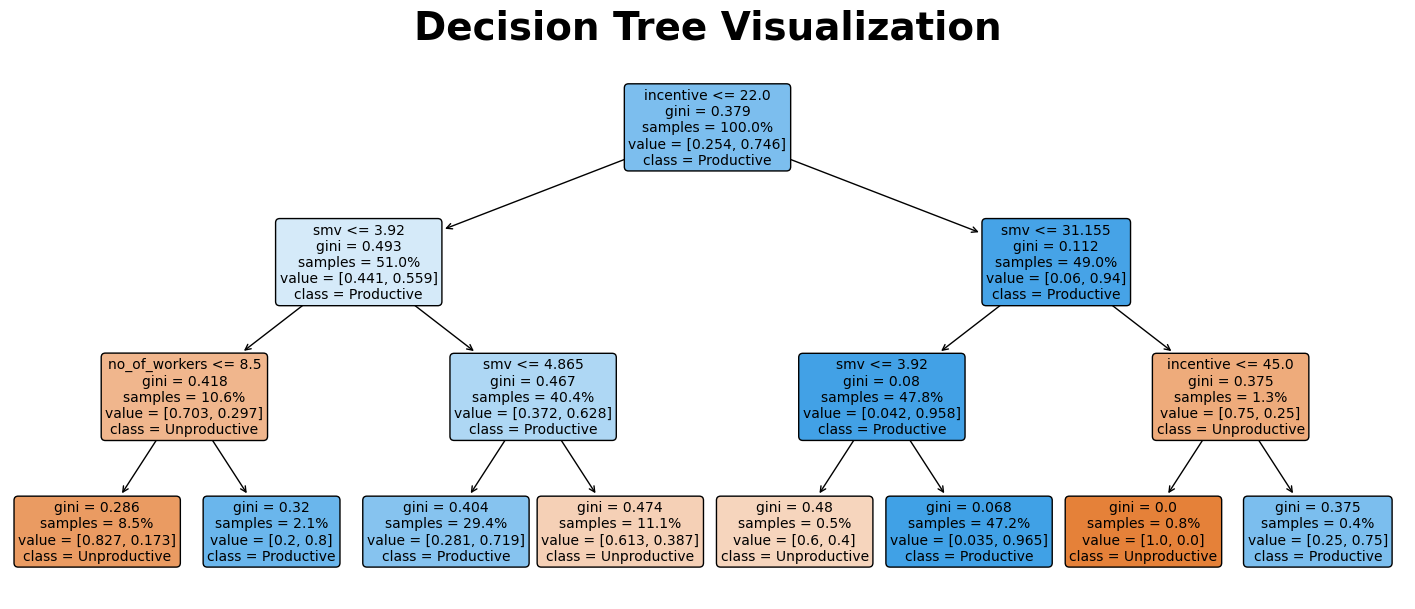

In [17]:
# Set figure size
plt.figure(figsize=[18, 7])

# Visualize the decision tree with detailed formatting
_ = plot_tree(tree,
              feature_names=list(X.columns),
              class_names=["Unproductive", "Productive"],
              filled=True,
              rounded=True,
              proportion=True,
              fontsize=10)

# Add a title and display the plot
plt.title('Decision Tree Visualization', weight='bold', size=28, pad=15)
plt.show()

From the decision tree, we can see that the most significant columns are `smv` and `incentive`. All the splits, except one (`no_of_workers`), used these two columns to progressively divide the dataset into more homogeneous subsets.

It's important to note that we pruned the tree by limiting its depth to a maximum of `3` levels to prevent overfitting. Without this pruning, we likely would have seen additional columns further dividing the dataset.

Now that we've plotted the tree, we can continue evaluating its effectiveness using alternative metrics such as the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), and [F1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [18]:
# Compute the confusion matrix to evaluate model performance
confusion_matrix(y_test, y_pred_test)

array([[ 35,  24],
       [ 13, 168]], dtype=int64)

From the confusion matrix:

- **True Negatives (TN)**: 35
- **False Positives (FP)**: 24
- **False Negatives (FN)**: 13
- **True Positives (TP)**: 168

Based on the results:

- The model correctly identified `168` productive observations and `35` unproductive ones.
- It misclassified `24` productive observations as unproductive and `13` unproductive observations as productive.
- The high number of `True Positives` and low `False Negatives` suggest the model is effective at identifying productive observations.
- The relatively lower number of `True Negatives` compared to `False Positives` suggests there may be room for improvement in accurately identifying unproductive observations.

In [19]:
# Print precision, recall, and F1 score metrics for model evaluation
print("Test precision:", round(precision_score(y_test, y_pred_test), 4))
print("Test recall:", round(recall_score(y_test, y_pred_test), 4))
print("Test F1:", round(f1_score(y_test, y_pred_test), 4))

Test precision: 0.875
Test recall: 0.9282
Test F1: 0.9008


The model's precision indicates that `87.5%` of the positive predictions were correct, whereas the recall shows that `92.82%` of actual positives were correctly identified. The F1 score, at `90.08%`, provides a balanced measure of precision and recall.

Compared to the test accuracy of `84.58%`, the F1 score reflects a more nuanced performance metric, suggesting that while the model is generally accurate, it performs better in distinguishing between the positive class and minimizing false positives and false negatives.

We can also evaluate our tree using cross-validation, specifically **K-fold cross-validation**, which is the default method in `scikit-learn`. This technique divides our dataset into folds and creates multiple versions of the dataset, where each version uses different observations for training and testing subsets. The algorithm iterates through each version and outputs a list of accuracy scores for all iterations. This approach helps ensure that our train and test accuracy scores weren't achieved by chance, by comparing them with several other possible outcomes.

In [20]:
# Perform 10-fold cross-validation and calculate accuracy scores
scores = cross_val_score(tree, X_train, y_train, cv=10)

# Print cross-validation accuracy scores and the mean score
print("Cross-validation accuracy scores:", scores.round(2))
print("Mean cross-validation accuracy:", scores.mean().round(4))

Cross-validation accuracy scores: [0.77 0.81 0.83 0.79 0.79 0.86 0.88 0.8  0.87 0.82]
Mean cross-validation accuracy: 0.8234


The cross-validation accuracy scores range from `0.77` to `0.88`, indicating that the model's performance can fluctuate depending on the specific subset of training data used. The mean cross-validation accuracy score of `0.8234` suggests that the model is generally reliable, although slightly lower than the initial test accuracy of `0.8458`. This variability highlights the importance of cross-validation in assessing model robustness.

To wrap up, let's now obtain cross-validated values for the other evaluation metrics.

In [21]:
# Perform cross-validation to obtain precision, recall, and F1 scores across 10 folds
multiple_scores = cross_validate(tree, X_train, y_train, cv=10, scoring=["precision", "recall", "f1"])

# Print the cross-validation precision, recall, and F1 scores for each fold
print(multiple_scores["test_precision"].round(2))
print(multiple_scores["test_recall"].round(2))
print(multiple_scores["test_f1"].round(2))
print()

# Calculate and print the mean cross-validation precision, recall, and F1 scores
print("Mean cross-validation precision:", round(multiple_scores["test_precision"].mean(), 2))
print("Mean cross-validation recall:", round(multiple_scores["test_recall"].mean(), 2))
print("Mean cross-validation F1:", round(multiple_scores["test_f1"].mean(), 2))

[0.82 0.85 0.88 0.81 0.89 0.89 0.88 0.82 0.9  0.85]
[0.89 0.92 0.9  0.94 0.82 0.93 0.96 0.94 0.93 0.93]
[0.85 0.88 0.89 0.87 0.85 0.91 0.92 0.88 0.92 0.89]

Mean cross-validation precision: 0.86
Mean cross-validation recall: 0.92
Mean cross-validation F1: 0.89


The decision tree demonstrates high performance across cross-validation folds. The average precision of `0.86` indicates reliable identification of productive cases, while the average recall of `0.92` suggests that the model effectively captures most actual productive cases. Furthermore, the average F1 score of `0.89` reflects a good balance between precision and recall.

## 7. Explaining the Decision Tree

Decision trees are an excellent choice for explaining our findings to a non-technical audience that isn’t involved in data science. In this case, we'll assume we need to present the insights to the garment company’s leaders, allowing them to quickly grasp the key metrics that lead to the success or failure of production objectives.

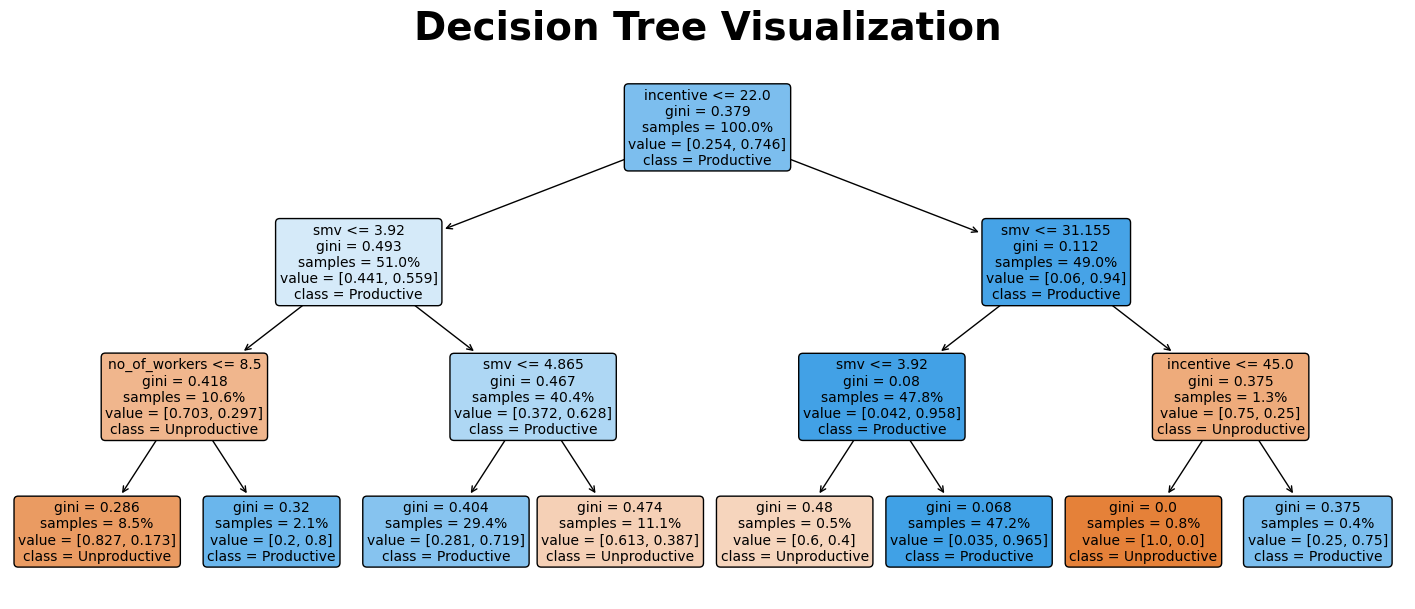

In [22]:
# Set figure size
plt.figure(figsize=[18, 7])

# Visualize the decision tree with detailed formatting
_ = plot_tree(tree,
              feature_names=list(X.columns),
              class_names=["Unproductive", "Productive"],
              filled=True,
              rounded=True,
              proportion=True,
              fontsize=10)

# Add a title and display the plot
plt.title('Decision Tree Visualization', weight='bold', size=28, pad=15)
plt.show()

The graphic highlights the most effective factors for predicting team productivity (e.g. date, department, and team number). It shows that `incentive` and `smv` are the most influential variables. The variable `incentive` represents financial motivation, while `smv` indicates the time allocated for tasks. Moreover, the first line of each box reveals that these two variables appear most frequently, indicating their high predictive power. The only exception is on the third level (from top to bottom), where `no_of_workers` appears at the top of a box.

The machine learning algorithm is called a **decision tree** because it resembles an inverted tree. The top box, or `root`, represents the most predictive feature, while the bottom boxes, or `leaves`, provide the final predictions about whether a team in a specific department was productive. The predictions are shown in the `class` component at the bottom of each box. While every box has a class component, we focus only on the classes found in the leaves.

To navigate from the top box to the bottom ones, we use the thresholds associated with each variable at the top of every box. Starting from the root, we compare our inputs with these thresholds until we reach the bottom level. Here, **input** primarily refers to the `incentive` and `smv` values for a specific team. We can obtain these values from any date in the dataset or select them ourselves to test hypothetical scenarios. This flexibility allows us to use the decision tree to predict outcomes for future or hypothetical situations, provided we have the corresponding incentive and SMV values.

To illustrate how this works, let's use a hypothetical example to predict team productivity:

1. Suppose the `incentive` is `22` and the `smv` is `4.44`. Starting from the root, the first comparison is `22 <= 22`. Since this evaluates to `True`, we proceed to the lower left box.
2. Following the rule of decision trees, we move left for `True` and right for `False`. We continue the process for the next box. The comparison now becomes `4.44 <= 3.92`. Since this is `False`, we move to the lower right box.
3. In that box, the final comparison is `4.44 <= 4.865`, which evaluates to `True`. We then follow the arrow to the final lower left box (the leaf), predicting that the team will be `Productive`.

In summary, with an incentive of `22` and an SMV of `4.44`, we predict that the team will be productive. The decision tree algorithm not only identified the variables with the strongest predictive power (`smv` and `incentive`), but also allowed us to make predictions based on values of our own choosing.

## 8. Building the Random Forest

After explaining our insights to the company's leaders, they have become excited about the potential of predictive decision trees. As a result, they are considering using our findings to revise policies and procedures in the factory. For example, they plan to pay closer attention to how incentives are awarded to workers.

Next, we will use the random forest ensemble method to determine whether we can enhance the decision tree's accuracy or confirm that it is already an optimal model. As a reminder, when a random forest generates training subsets for each individual tree, it leaves out some observations from the dataset. When the OOB score is activated, these left-out observations are used as validation subsets.

In [23]:
# Initialize RandomForestClassifier with OOB score calculation, and fit the model to the training data
forest = RandomForestClassifier(oob_score=True, random_state=24)
forest.fit(X_train, y_train)

# Predict on the test set
y_pred_forest = forest.predict(X_test)

# Print test accuracy and out-of-bag score of the Random Forest model
print("Test accuracy:", round(accuracy_score(y_test, y_pred_forest), 4))
print("Out-of-bag score:", round(forest.oob_score_, 4))

Test accuracy: 0.8708
Out-of-bag score: 0.8265


Since the evaluation metrics of our random forest are similar to those of our decision tree, we can be confident in our results. It's worth noting that by default, the generalization score of the OOB method is accuracy.

Due to their tendency to overfit the data, it's always considered good practice to verify decision trees using an ensemble method such as a random forest.

## 9. Conclusion

In this project, we introduced the [Productivity Prediction of Garment Employees](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees) dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/). The dataset represented the `sewing` and `finishing` departments, with teams assigned specific productivity targets. Various values were recorded across the different columns of the dataset. Additionally, the `actual_productivity` column reflects the percentage of productivity achieved, with values being close to, above, or below the targeted productivity.

Initially, the dataset contained `1,197` entries and `15` columns, featuring both numerical and categorical data. All columns had complete data except for `wip`, which had missing values. The name of the `quarter` column is somewhat misleading, as `quarter` typically refers to a part of a year, but in this case, it refers to a part of a month. We also computed summary statistics for the numerical columns to highlight metrics such as the mean and standard deviation. Additionally, we examined a few columns in our data to check for consistency.

To perform data cleaning, we corrected inaccurate values, dropped unnecessary data, converted column types, and determined which features to retain for the decision tree algorithm. Since we decided to build a classification tree, we created a new column called `productive`, which contains boolean values indicating whether productivity targets were achieved for each observation. Additionally, we converted some categorical columns to numerical format.

To build our tree, we divided the prepared data into features and target labels, then split the dataset into training and test sets. The training and test accuracies of `83.59%` and `84.58%` indicate that the model performs well in classifying whether productivity targets were met without overfitting. Next, we visualized the decision tree and found that the most significant columns are `incentive` and `smv`. All the splits, except one (`no_of_workers`), used these two columns to progressively divide the dataset into more homogeneous subsets. To prevent overfitting, we pruned the tree by limiting its depth to a maximum of `3` levels. Without this pruning, additional columns might have further divided the dataset.

We evaluated the effectiveness of the decision tree on the test data using metrics such as the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), and [F1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html). Based on the confusion matrix, the model is effective at identifying productive observations, though there may be room for improvement in accurately identifying unproductive ones. Furthermore, the model's precision indicates that `87.5%` of the positive predictions were correct, whereas the recall shows that `92.82%` of actual positives were correctly identified. The F1 score, at `90.08%`, provides a balanced measure of precision and recall. Compared to the test accuracy of `84.58%`, the F1 score reflects a more nuanced performance metric.

We also evaluated our decision tree using K-fold cross-validation to ensure that our train and test accuracy scores weren't achieved by chance. The cross-validation scores range from `0.77` to `0.88`, indicating that the model's performance can fluctuate depending on the specific subset of training data used. The mean cross-validation accuracy score of `0.8234` suggests that the model is generally reliable, although slightly lower than the initial test accuracy of `0.8458`. After obtaining cross-validated values for other evaluation metrics, we found that the average precision of `0.86` indicates reliable identification of productive cases, while the average recall of `0.92` suggests the model effectively captures most actual productive cases. Additionally, the F1 score averages `0.89`, reflecting a good balance between precision and recall.

Since decision trees are an excellent tool for explaining findings to a non-technical audience, we created a graphic that highlights the most effective factors for predicting team productivity. We concluded that the decision tree algorithm not only identified the variables with the strongest predictive power (`incentive` and `smv` in our case), but also allowed us to make predictions based on values of our own choosing.

Finally, we used the random forest ensemble method to determine whether we could enhance the decision tree's accuracy or confirm that it is already an optimal model. Since the evaluation metrics of our random forest are similar to those of our decision tree, we can be confident in our results. Because decision trees tend to overfit the data, it's always good practice to verify their performance using an ensemble method like random forest.